# DATA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn import set_config
set_config(display='diagram')

## lecture des données

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [3]:
print("train shape: ",train.shape)
print("test shape: ", test.shape) 

train shape:  (1460, 81)
test shape:  (1459, 80)


## donnée train

## la target

In [4]:
# prix moyen d'un ppartement 180921 dollars
#train.SalePrice.describe()

coefficient d'asymétrie:  1.8828757597682129


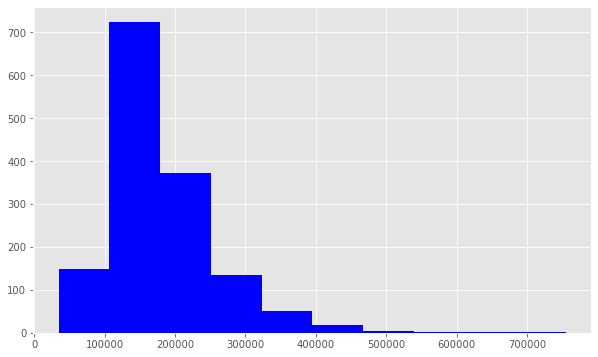

In [7]:
# si c'est asymétrique c'est bon si non je convertie en logarithmique
print("coefficient d'asymétrie: ", train.SalePrice.skew())
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)
plt.hist(train.SalePrice,color='blue')
plt.show() #Positive asymmetry or to the right.

In [8]:
train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

La valeur de y est :  0.12133506220520406


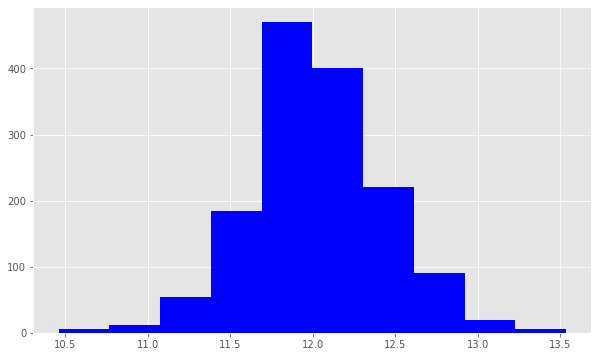

In [9]:
# ma target est log c'est bon

target=np.log(train.SalePrice)
print("La valeur de y est : ", target.skew())
plt.hist(target,color="blue")
plt.show()

In [10]:
target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

## les variables numériques 

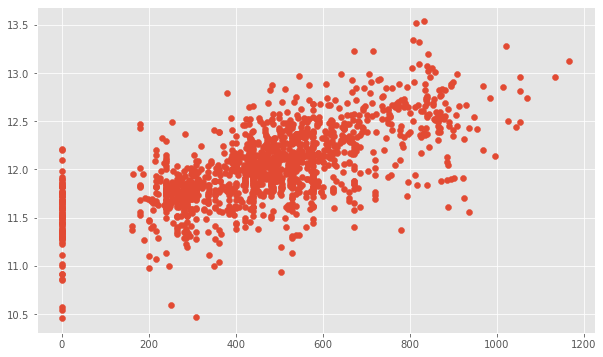

In [7]:
train=train[train.GarageArea <1200]
train 
plt.scatter(x=train.GarageArea,y=np.log(train.SalePrice)) # je recrée la target
plt.show()

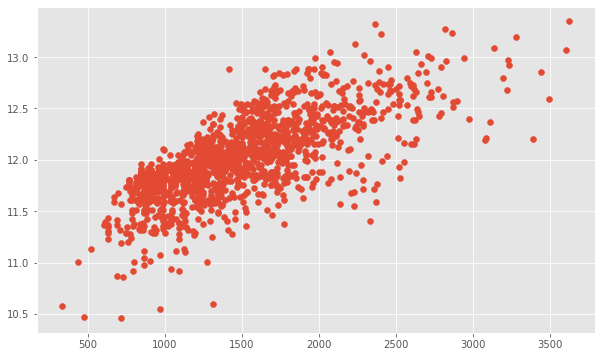

In [8]:
train=train[train.GrLivArea <4000]
train 
plt.scatter(x=train.GrLivArea,y=np.log(train.SalePrice)) # je recrée la target
plt.show()

In [3]:
X = train.drop(['SalePrice', 'Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch'], axis=1)
y = train.SalePrice

NameError: name 'train' is not defined

In [10]:
categorical_features=train.select_dtypes(exclude=[np.number]) 
numeric_features=train.select_dtypes(include=[np.number])
#numeric_features.dtypes

In [11]:
drop_nan_col_categorical = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
categorical_features = categorical_features.drop(drop_nan_col_categorical, axis=1)
#categorical_features.dtypes

In [12]:
drop_nan_col_numerical = ['LotFrontage', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch']
numeric_features = numeric_features.drop(drop_nan_col_numerical, axis=1)

In [13]:
categorical_features=train.select_dtypes(exclude=[np.number])
numeric_features=train.select_dtypes(include=[np.number])

In [16]:
categorical_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# coorrélation
corr=numeric_features.corr() 
# 5 plus forte corrélations avec le prix
print(corr.SalePrice.sort_values(ascending=False)[:5]) 
# 5 plus faibles corrélations avec le prix
print(corr.SalePrice.sort_values(ascending=True) [:5]) 

In [ ]:
quality_pivot=train.pivot_table(index="OverallQual",values="SalePrice",aggfunc=np.median) 
quality_pivot

In [ ]:
#quality_pivot.plot(kind="bar",color="blue") 
#plt.xticks(rotation=0) 
#plt.show()

In [ ]:
# 2 ieme plus corrélé
# GrLivArea : Surface habitable au-dessus du niveau du sol (pieds carrés)
#Nous examinons la variable suivante la plus corrélée, GrLivArea. 
#plt.scatter(x=train["GrLivArea"],y=target) 
#plt.show()

In [ ]:
#plt.scatter(x=train["GarageArea"],y=target) 
#plt.show()

##  éliminer les valeurs aberrantes, les valeurs nulles et manquantes

### outliers

### Null et valeur manquante

In [ ]:
null_nim=pd.DataFrame(numeric_features.isnull().sum().sort_values(ascending=False)[:10])
null_cat=pd.DataFrame(categorical_features.isnull().sum().sort_values(ascending=False)[:10])

In [ ]:
numeric_features.isnull().values.sum()

In [ ]:
categorical_features.isnull().values.sum()

In [ ]:
#categorical_features.describe()

### visualisation des valeurs manquantes

In [ ]:
#nans = train.isna().sum().sort_values(ascending=False)
#nans = nans[nans > 0]
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.grid()
#ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
#ax.set_ylabel("Valeurs manquantes", labelpad=10)
#ax.set_xlim(-0.6, len(nans) - 0.4)
#ax.xaxis.set_tick_params(rotation=90)
#plt.show()

### feature engenering

In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
transfo_numerical = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('standard', StandardScaler())])

transfo_quali = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [ ]:
preparation = ColumnTransformer(
    transformers=[
        ('quanti', transfo_numerical , numeric_features),
        ('quali', transfo_quali , categorical_features)])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# on crée un pipeline de traitement intégrant la préparation
model = Pipeline(steps=[('preparation', preparation),
                      ('linear', LinearRegression())])

# on sépare la cible du reste des données


In [ ]:
# on construit les échantillons d'apprentissage et de validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
#model.fit(X_train, y_train)